In [23]:
import sys
from tqdm.auto import tqdm
sys.path.append("..")
from mango.environments import frozen_lake
import utils

params = {"map_name":"RANDOM", "p":0.9, "shape":(8,8), "seed":0}
env = frozen_lake.CustomFrozenLakeEnv(**params)
env = frozen_lake.wrappers.ReInitOnReset(env, **params)
env = frozen_lake.wrappers.TensorObservation(env, one_hot=True)
for i in tqdm(range(1000)):
    obs, info = env.reset()
#print(f"Observation:\n {obs.__repr__()}")
utils.render(env, abstraction_sizes=[(2,2), (4, 4)])

  0%|          | 0/1000 [00:00<?, ?it/s]

ValueError: No position available

In [24]:
obs

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [1., 1., 1., 0., 0., 0., 0., 0., 0., 1.],
         [1., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
         [1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
         [1., 1., 1., 0., 0., 1., 1., 0., 0., 1.],
         [1., 1., 1., 1., 1.,

In [2]:
import sys
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
sys.path.append("..")

In [16]:
import utils_sim
env = utils_sim.make_env(2,3,0.5,False,2)

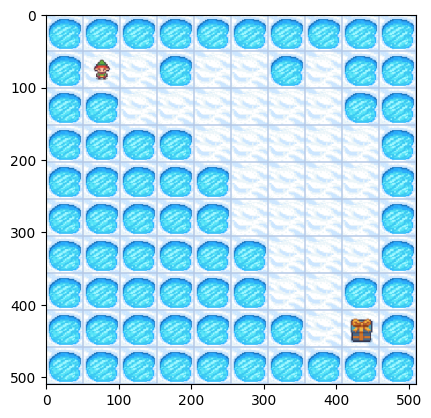

In [17]:
env.reset()
plt.imshow(env.render())